In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

%config InlineBackend.figure_format = 'retina'

In [2]:
tdf = pd.read_excel("../data/LOMTiming.xlsx")

# Fixing notes recorded in merged cells 
tdf.at[0:3, "type"] = "Nonvectorized (v.1)"
tdf.loc[tdf["type"].isna(), "type"] = "Vectorized (v.2)"
tdf

,Site,Number Buildings,Years,Time 1 (Running LOM),Time 2 (Running LOM),Time 3 (Running LOM),Granularity,Old ANL's LOM: non-vectorized version (slow),type
0,180,1,1,29.80s,28.96s,29.32s,1 Hour,NaN,Nonvectorized (v.1)
1,180,1,7,213.90s,211.21s,214.83s,1 Hour,NaN,Nonvectorized (v.1)
2,180,5,1,140.02s,140.48s,147.54s,1 Hour,NaN,Nonvectorized (v.1)
3,180,5,7,1037.60s,1038.06s,1044.40s,1 Hour,NaN,Nonvectorized (v.1)
4,180,1,1,0.55s,0.56s,0.56s,1 Hour,NaN,Vectorized (v.2)
5,180,1,7,4.02s,4.10s,3.98s,1 Hour,New ANL's LOM: vertorized version (fast),Vectorized (v.2)
6,180,5,1,2.76s,2.65s,2.72s,1 Hour,NaN,Vectorized (v.2)
7,180,5,7,22.03s,20.72s,20.59s,1 Hour,NaN,Vectorized (v.2)


In [3]:
selected = tdf[tdf["Number Buildings"] == 5]
selected = selected[["Years", "Time 1 (Running LOM)", "Time 2 (Running LOM)", "Time 3 (Running LOM)", "type"]]

In [4]:
runtimes = pd.DataFrame(columns=["type", "Years of hourly data", "Runtime"])
for idx, row in selected.iterrows():
    for i in range(1,4):
        runtimes.loc[len(runtimes)] = [row["type"], row["Years"], float(row["Time %d (Running LOM)" % i].rstrip(" ").rstrip("s"))] 
runtimes

,type,Years of hourly data,Runtime
0,Nonvectorized (v.1),1,140.02
1,Nonvectorized (v.1),1,140.48
2,Nonvectorized (v.1),1,147.54
3,Nonvectorized (v.1),7,1037.60
4,Nonvectorized (v.1),7,1038.06
5,Nonvectorized (v.1),7,1044.40
6,Vectorized (v.2),1,2.76
7,Vectorized (v.2),1,2.65
8,Vectorized (v.2),1,2.72
9,Vectorized (v.2),7,22.03


In [5]:
runtimes[runtimes["Years of hourly data"] == 1]

,type,Years of hourly data,Runtime
0,Nonvectorized (v.1),1,140.02
1,Nonvectorized (v.1),1,140.48
2,Nonvectorized (v.1),1,147.54
6,Vectorized (v.2),1,2.76
7,Vectorized (v.2),1,2.65
8,Vectorized (v.2),1,2.72


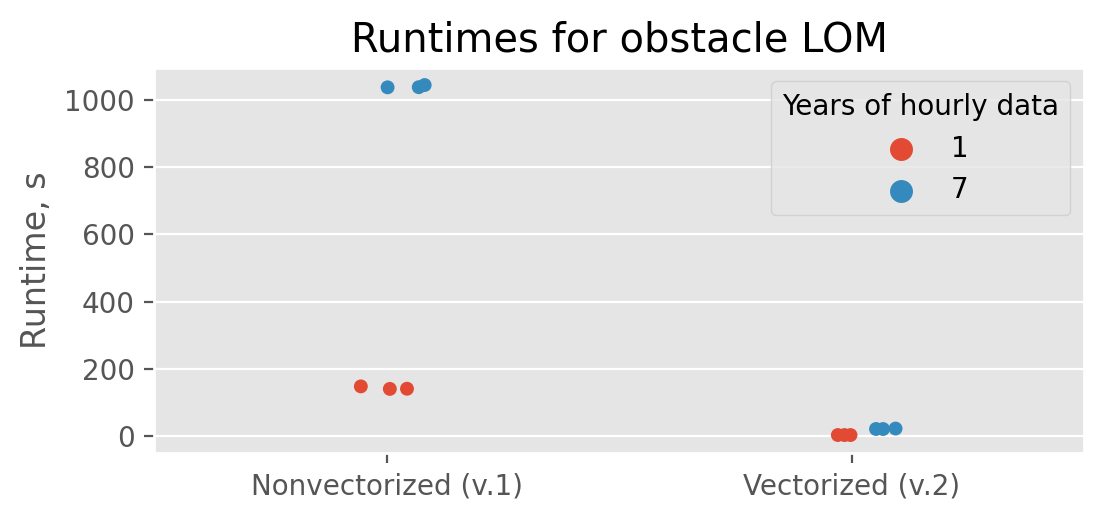

In [6]:
from matplotlib import pyplot as plt
plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(6,2.5))
#sns.boxplot(data=runtimes, x="type", y="Runtime", hue="Years of hourly data", ax=ax)
sns.stripplot(data=runtimes, x="type", y="Runtime", hue="Years of hourly data", ax=ax)
ax.set_xlabel("")
ax.set_ylabel("Runtime, s")
ax.set_title("Runtimes for obstacle LOM")
plt.show()